In [36]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
glass1 = pd.read_csv('glass.csv')
glass1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass1.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [5]:
glass1.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


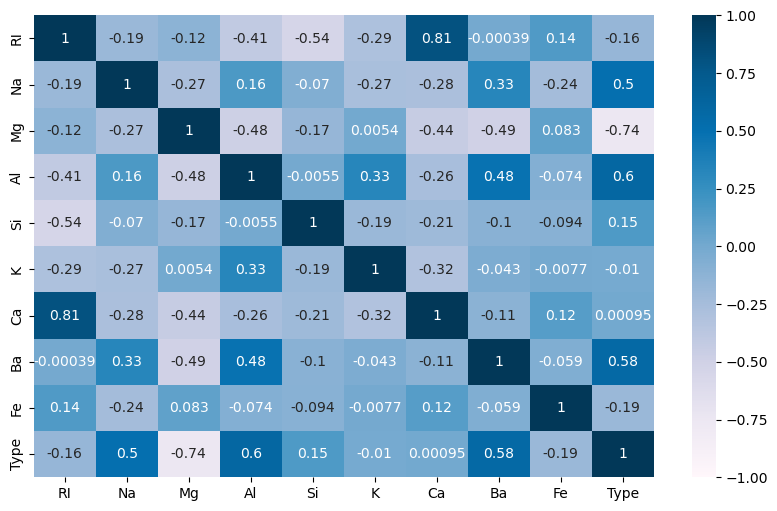

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(glass1.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')
plt.show()

In [7]:
glass1.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

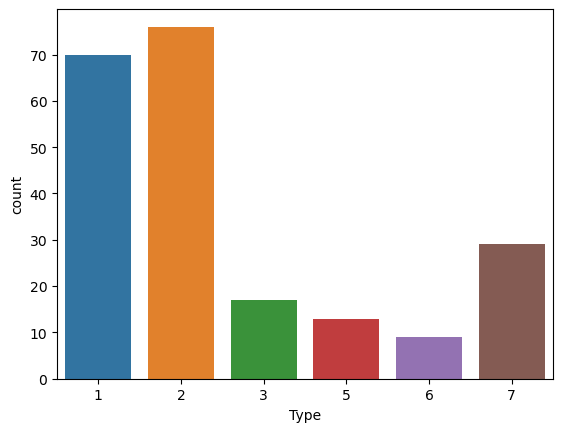

In [8]:
# Checking for class imbalance:
sns.countplot(x = 'Type',data = glass1)
plt.show()

Box Plot of :  RI


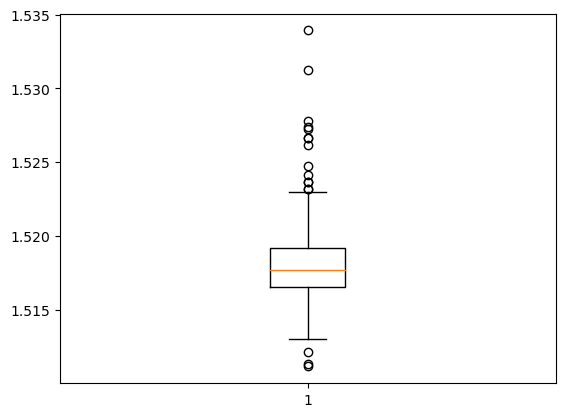

Box Plot of :  Na


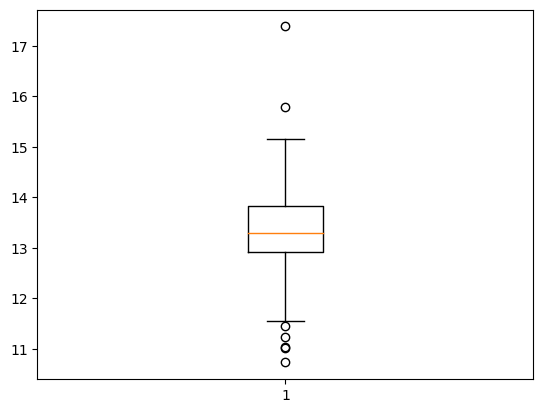

Box Plot of :  Mg


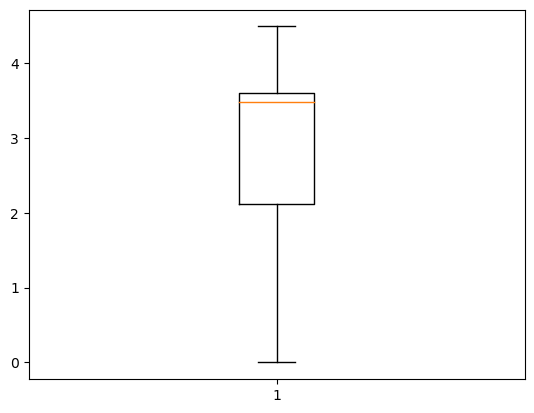

Box Plot of :  Al


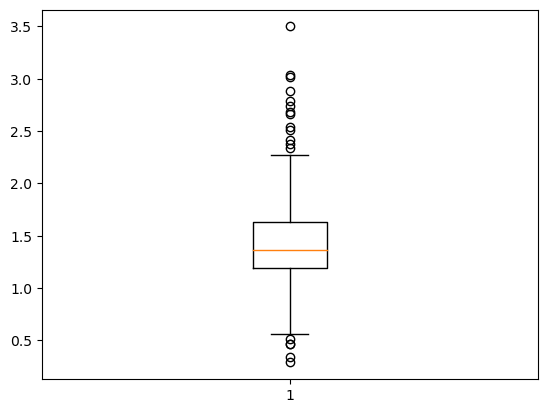

Box Plot of :  Si


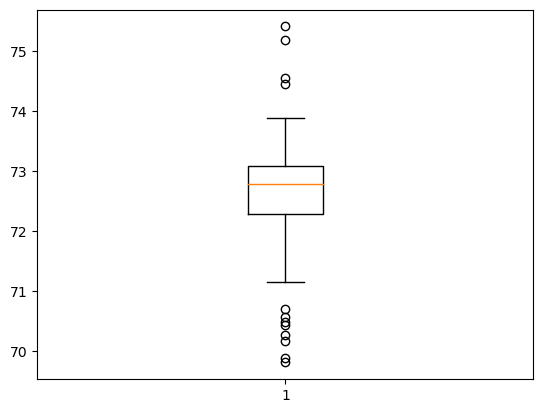

Box Plot of :  K


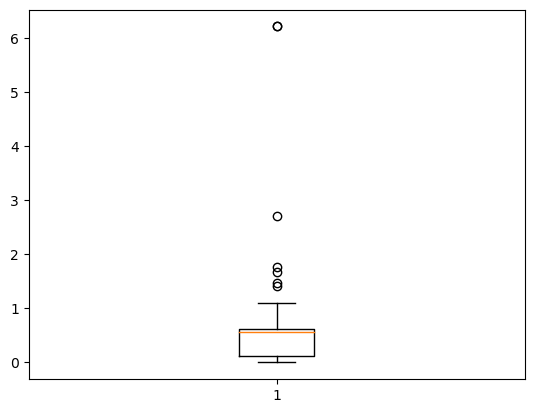

Box Plot of :  Ca


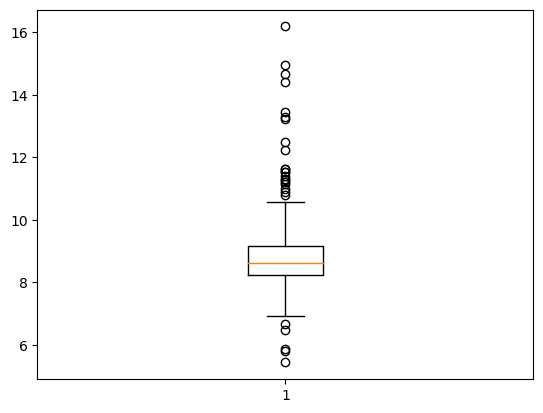

Box Plot of :  Ba


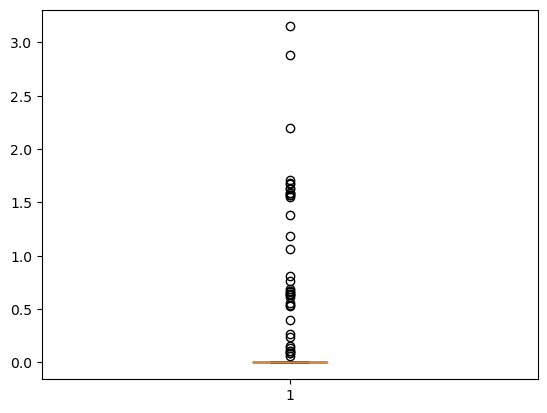

Box Plot of :  Fe


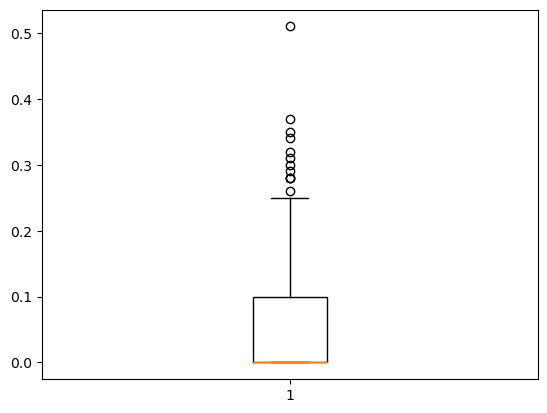

Box Plot of :  Type


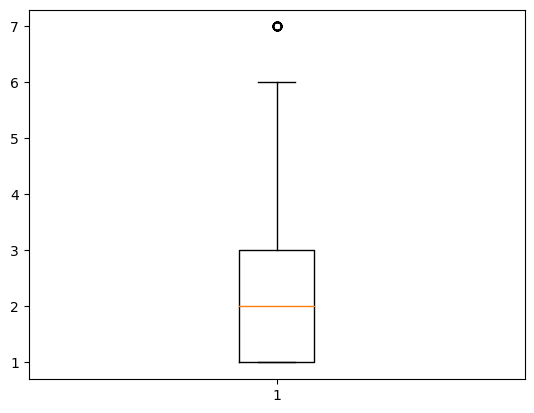

In [9]:
for i in glass1.columns:
    print('Box Plot of : ',i)
    plt.boxplot(glass1[i])
    plt.show()

Histogram of :  RI


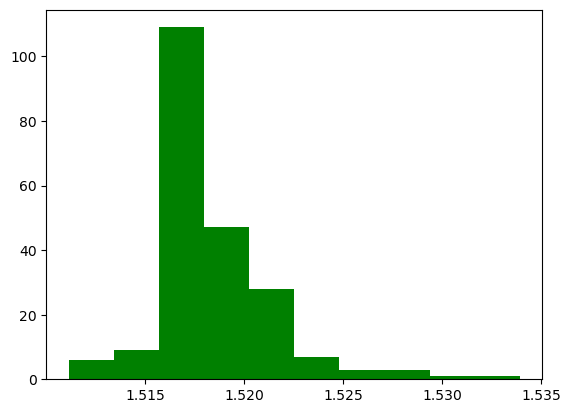

Histogram of :  Na


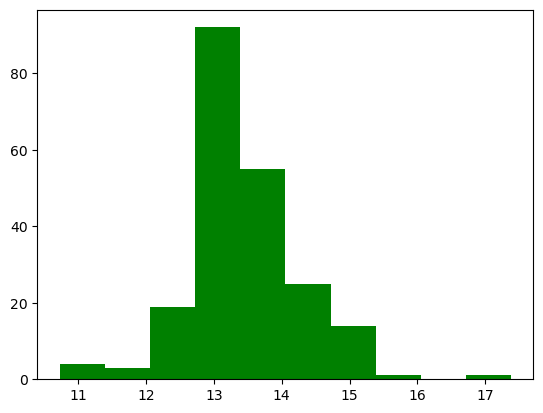

Histogram of :  Mg


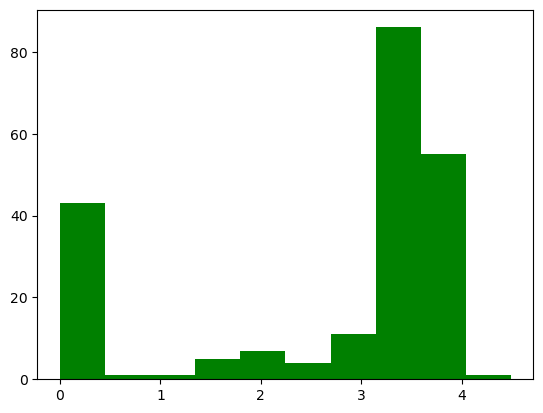

Histogram of :  Al


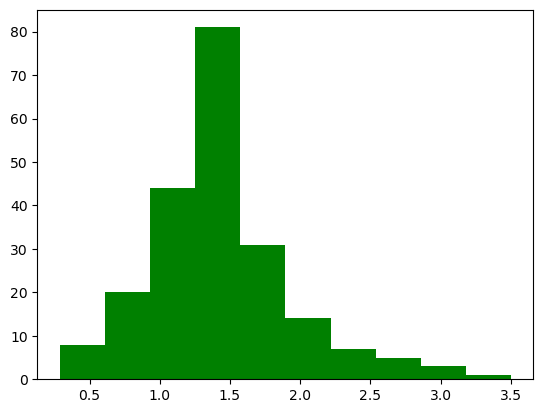

Histogram of :  Si


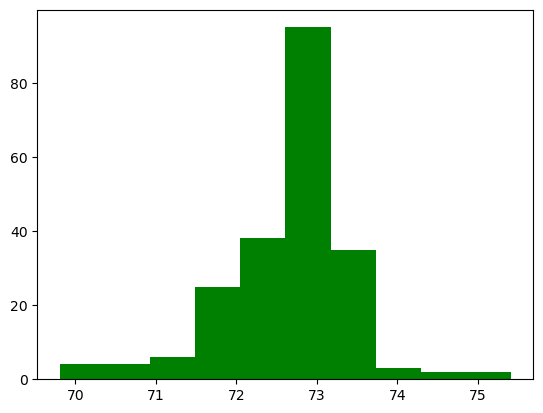

Histogram of :  K


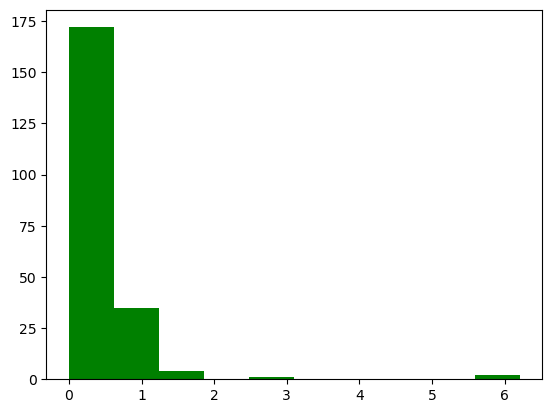

Histogram of :  Ca


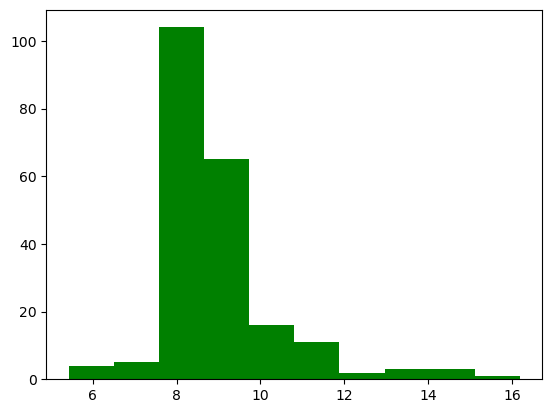

Histogram of :  Ba


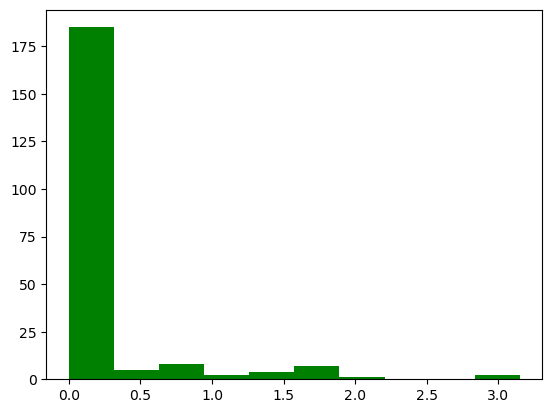

Histogram of :  Fe


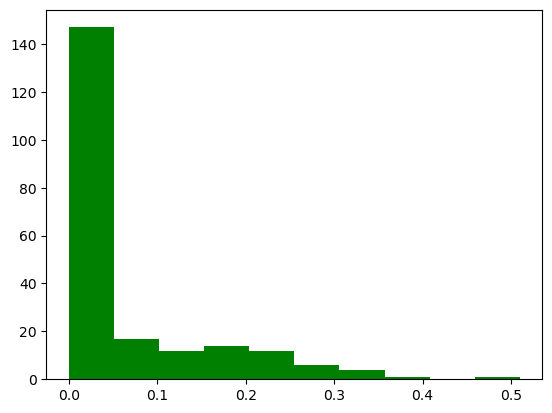

Histogram of :  Type


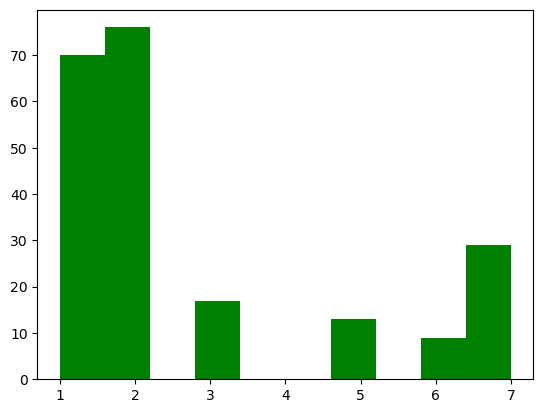

In [10]:
for i in glass1.columns:
    print('Histogram of : ',i)
    plt.hist(glass1[i],color='Green')
    plt.show()

In [11]:
# Checking for duplicated values:
glass1[glass1.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [12]:
glass1.drop_duplicates(inplace=True)
glass1.reset_index(inplace=True,drop=True)

<Figure size 3000x3000 with 0 Axes>

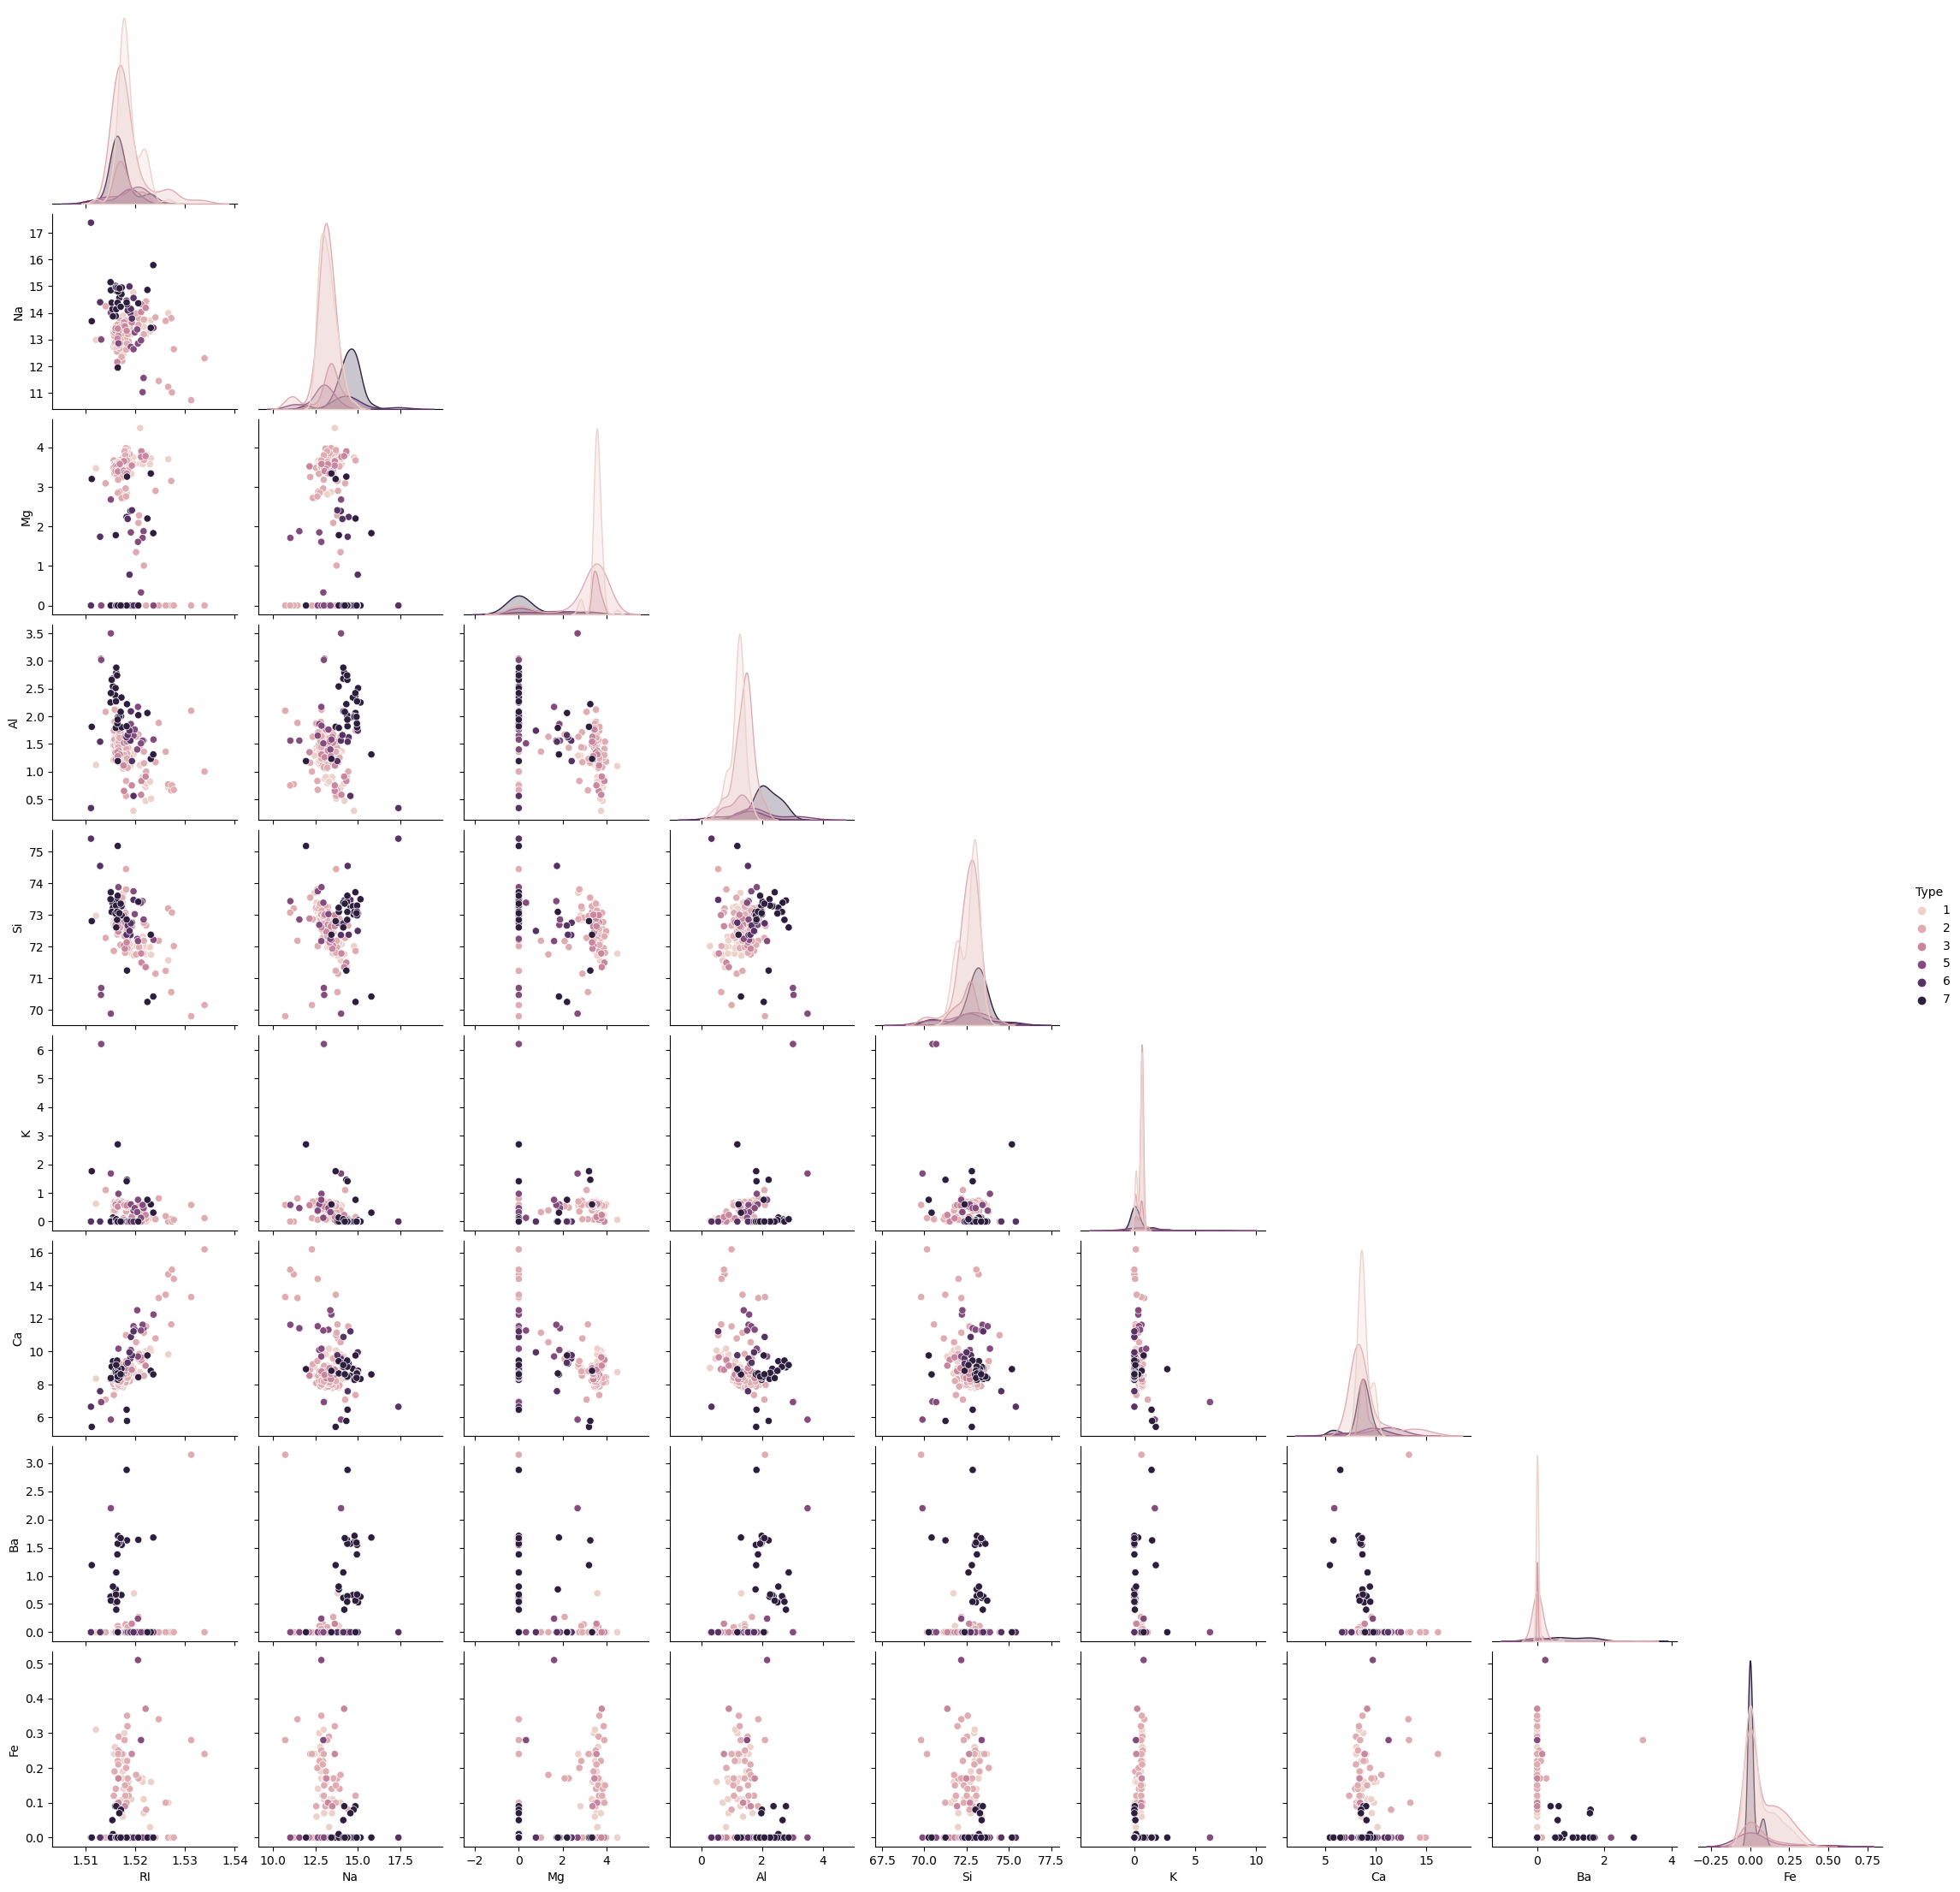

In [15]:
# Plotting pairlot to check all the features at once:
plt.figure(figsize=(30,30))
sns.pairplot(glass1,corner=True,diag_kind='kde',hue = 'Type')
plt.show()

In [16]:
# Splitting data into features and target:
X = glass1.iloc[:,:-1]
y = glass1.iloc[:,-1]

In [18]:
# Scaling the data as det as we are going to perform distance based calculations:
XScaled = X.apply(zscore)
XScaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301


In [28]:
# Splitting the data into train and test:
X_train,X_test,y_train,y_test=train_test_split(XScaled,y,test_size=0.25,random_state=42)

#### Build kNN Model

In [29]:
NNH = KNeighborsClassifier(n_neighbors=3,weights='distance')
NNH.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

#### Evaluate performace of kNN Model

In [30]:
y_train_pred = NNH.predict(X_train)

In [31]:
accuracy_score(y_train,y_train_pred)

1.0

In [32]:
y_test_pred = NNH.predict(X_test)

In [33]:
accuracy_score(y_test,y_test_pred)

0.7592592592592593

In [34]:
# Let's stratify train test split and run model again:
X_train,X_test,y_train,y_test=train_test_split(XScaled,y,test_size=0.25,random_state=42,stratify=y)

In [35]:
NNH = KNeighborsClassifier(n_neighbors=3,weights='distance')
NNH.fit(X_train,y_train)
y_test_pred = NNH.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.7962962962962963

In [37]:
#Let's check confusion matrix:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[14,  4,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  1,  0],
       [ 3,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0,  0,  7]], dtype=int64)

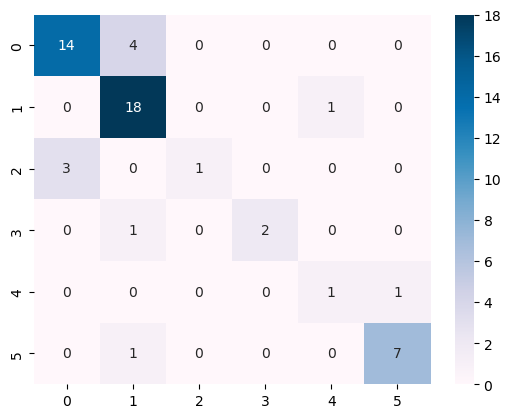

In [39]:
sns.heatmap(cm,annot=True,cmap='PuBu')
plt.show()

#### Choosing best K value:

In [45]:
train_scores = []
test_scores = []
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors=k,weights='distance')
    NNH.fit(X_train,y_train)
    train_scores.append(NNH.score(X_train,y_train))
    test_scores.append(NNH.score(X_test,y_test))

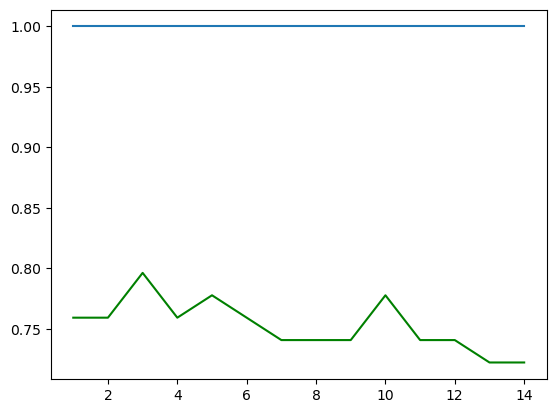

In [46]:
plt.plot(range(1,15),train_scores)
plt.plot(range(1,15),test_scores,color = 'green')
plt.show()

In [47]:
# Let's try with weights = 'uniform'
train_scores = []
test_scores = []
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    NNH.fit(X_train,y_train)
    train_scores.append(NNH.score(X_train,y_train))
    test_scores.append(NNH.score(X_test,y_test))

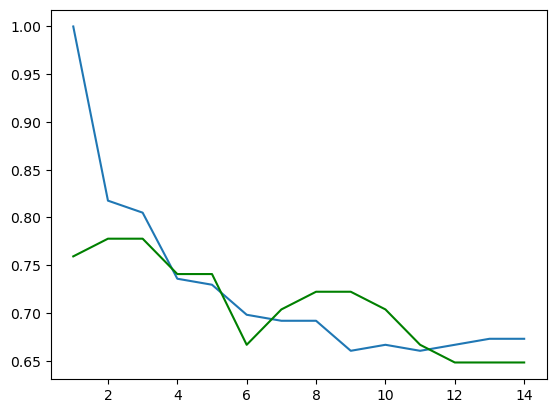

In [48]:
plt.plot(range(1,15),train_scores)
plt.plot(range(1,15),test_scores,color = 'green')
plt.show()

In [51]:
# K = 3 with weights = uniform, looks a good option:
NNH = KNeighborsClassifier(n_neighbors=3,weights='uniform')
NNH.fit(X_train,y_train)
y_train_pred = NNH.predict(X_train)
print('Accuracy score for train dataset is : ',accuracy_score(y_train,y_train_pred))
y_test_pred = NNH.predict(X_test)
print('Accuracy score for test dataset is : ',accuracy_score(y_test,y_test_pred))

Accuracy score for train dataset is :  0.8050314465408805
Accuracy score for test dataset is :  0.7777777777777778


In [52]:
#Let's check confusion matrix:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[14,  4,  0,  0,  0,  0],
       [ 1, 18,  0,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0,  0,  7]], dtype=int64)

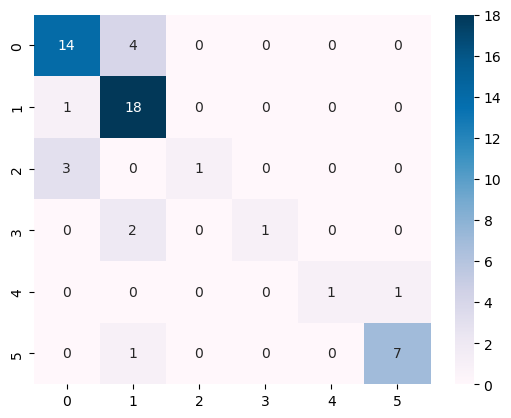

In [53]:
sns.heatmap(cm,annot=True,cmap='PuBu')
plt.show()

In [54]:
classification_report(y_test,y_test_pred,output_dict=True)

{'1': {'precision': 0.7777777777777778,
  'recall': 0.7777777777777778,
  'f1-score': 0.7777777777777778,
  'support': 18},
 '2': {'precision': 0.72,
  'recall': 0.9473684210526315,
  'f1-score': 0.8181818181818181,
  'support': 19},
 '3': {'precision': 1.0, 'recall': 0.25, 'f1-score': 0.4, 'support': 4},
 '5': {'precision': 1.0,
  'recall': 0.3333333333333333,
  'f1-score': 0.5,
  'support': 3},
 '6': {'precision': 1.0,
  'recall': 0.5,
  'f1-score': 0.6666666666666666,
  'support': 2},
 '7': {'precision': 0.875, 'recall': 0.875, 'f1-score': 0.875, 'support': 8},
 'accuracy': 0.7777777777777778,
 'macro avg': {'precision': 0.8954629629629629,
  'recall': 0.6139132553606238,
  'f1-score': 0.6729377104377104,
  'support': 54},
 'weighted avg': {'precision': 0.8088888888888889,
  'recall': 0.7777777777777778,
  'f1-score': 0.7588664421997756,
  'support': 54}}